Lower GM: nan
PM: 180.0 deg or 3.14 rad
Ms: 1.1942105031208885
Mt: 1.3772609923264154


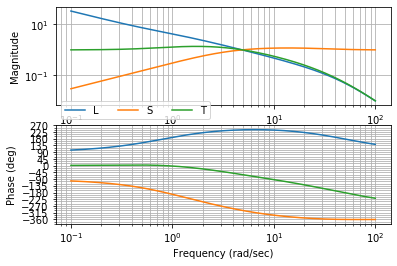

In [2]:
from __future__ import print_function
import numpy as np
import control
import matplotlib.pyplot as plt

from utils import feedback

w = np.logspace(-1, 2, 1000)
s = control.tf([1, 0], 1)
G = 4/((s - 1)*(0.02*s + 1)**2)
Kc = 1.25
tau1 = 1.5
K = Kc*(1 + 1/(tau1*s))
L = K*G
S = feedback(1, L)
T = feedback(L, 1)

mag, phase, omega = control.bode(L, w)
magS, phaseS, omega = control.bode(S, w)
magT, phaseT, omega = control.bode(T, w)
plt.legend(["L", "S", "T"],
           bbox_to_anchor=(0, 1.01, 1, 0), loc=3, ncol=3)

Ms = max(magS)
Mt = max(magT)

gm, pm, wg, wp = control.margin(mag, phase, omega)

Lu_180 = 1/np.abs(control.evalfr(L, wg))
P = np.angle(control.evalfr(L, wp)) + np.pi

print("Lower GM:", Lu_180)
print("PM:", np.round(P*180/np.pi, 1), "deg or", np.round(P, 2), "rad")
print("Ms:", Ms)
print("Mt:", Mt)

plt.show()
